<a href="https://colab.research.google.com/github/lucasWAFULA/lk1/blob/main/DSA8203_CAT_I_Lucas_Wafula_190586.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Country of Focus: Republic of Chad**
#Data Source:https://data.humdata.org/dataset/faostat-food-prices-for-chad
#Period of Collection:01st January, 2007 to 31st December, 2022

In [1]:

from google.colab import files
uploaded = files.upload()

Saving producer-food_prices_chad.csv to producer-food_prices_chad.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(list(uploaded.keys())[0])

In [5]:
df.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,#indicator+code,NaN,#indicator+name,NaN,NaN,NaN,#date+year,NaN,NaN,#indicator+type,#indicator+value+num,NaN
1,TCD,01/01/2011,31/01/2011,39.0,'148,Chad,486,'01312,Bananas,5530.0,Producer Price (LCU/tonne),2011.0,2011,7001.0,January,LCU,451000,A
2,TCD,01/02/2011,28/02/2011,39.0,'148,Chad,486,'01312,Bananas,5530.0,Producer Price (LCU/tonne),2011.0,2011,7002.0,February,LCU,464000,A
3,TCD,01/03/2011,31/03/2011,39.0,'148,Chad,486,'01312,Bananas,5530.0,Producer Price (LCU/tonne),2011.0,2011,7003.0,March,LCU,494000,A
4,TCD,01/04/2011,30/04/2011,39.0,'148,Chad,486,'01312,Bananas,5530.0,Producer Price (LCU/tonne),2011.0,2011,7004.0,April,LCU,498000,A


In [ ]:
df.describe()

,Area Code,Element Code,Year Code,Months Code
count,2562.0,2562.000000,2562.000000,2562.000000
mean,39.0,5533.069087,2014.812646,7014.002732
std,0.0,4.089432,4.406257,7.695264
min,39.0,5530.000000,2007.000000,7001.000000
25%,39.0,5530.000000,2011.000000,7007.000000
50%,39.0,5530.000000,2015.000000,7021.000000
75%,39.0,5539.000000,2018.000000,7021.000000
max,39.0,5539.000000,2022.000000,7021.000000


In [ ]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
# Count missing values in each column
missing_per_column = df.isnull().sum()
print(missing_per_column)


Iso3                 0
StartDate            0
EndDate              0
Area Code            1
Area Code (M49)      1
Area                 0
Item Code            0
Item Code (CPC)      1
Item                 0
Element Code         1
Element              1
Year Code            1
Year                 0
Months Code          1
Months               1
Unit               816
Value                0
Flag                 1
dtype: int64


In [ ]:
# Count total missing values in the DataFrame
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 825


In [ ]:
df.dtypes

,0
Iso3,object
StartDate,object
EndDate,object
Area Code,float64
Area Code (M49),object
Area,object
Item Code,object
Item Code (CPC),object
Item,object
Element Code,float64


In [ ]:
#Basic information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             2563 non-null   object 
 1   StartDate        2563 non-null   object 
 2   EndDate          2563 non-null   object 
 3   Area Code        2562 non-null   float64
 4   Area Code (M49)  2562 non-null   object 
 5   Area             2563 non-null   object 
 6   Item Code        2563 non-null   object 
 7   Item Code (CPC)  2562 non-null   object 
 8   Item             2563 non-null   object 
 9   Element Code     2562 non-null   float64
 10  Element          2562 non-null   object 
 11  Year Code        2562 non-null   float64
 12  Year             2563 non-null   object 
 13  Months Code      2562 non-null   float64
 14  Months           2562 non-null   object 
 15  Unit             1747 non-null   object 
 16  Value            2563 non-null   object 
 17  Flag          

In [ ]:
#Handling Missing Values
df=df.drop(0).reset_index(drop=True)

In [ ]:
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
missing_values_summary=df.isnull().sum()
print(missing_values_summary)

Iso3                 0
StartDate            0
EndDate              0
Area Code            0
Area Code (M49)      0
Area                 0
Item Code            0
Item Code (CPC)      0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Months Code          0
Months               0
Unit               816
Value                0
Flag                 0
dtype: int64


In [ ]:
#Correct Data Types to ensure that column has appropriate data
df['StartDate'] = pd.to_datetime(df['StartDate'],errors='coerce')
df['EndDate'] = pd.to_datetime(df['EndDate'],errors='coerce')

<ipython-input-73-078ecd3b2325>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['EndDate'] = pd.to_datetime(df['EndDate'],errors='coerce')


In [ ]:
#Converting Year to Integer
df['Year'] = df['Year'].astype(int)
#Coverting Area Code to Integer
df['Area Code'] = df['Area Code'].astype(int)
#Verification
df.dtypes

,0
Iso3,object
StartDate,datetime64[ns]
EndDate,datetime64[ns]
Area Code,int64
Area Code (M49),object
Area,object
Item Code,object
Item Code (CPC),object
Item,object
Element Code,float64


In [ ]:
#Removal of Unnecessary Columns
df_columns = df.columns
columns_to_drop = ['Iso3', 'Area Code (M49)', 'Item Code (CPC)', 'Flag']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_columns]
df=df.drop(columns=existing_columns_to_drop)
df.columns

Index(['StartDate', 'EndDate', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Year Code', 'Year', 'Months Code', 'Months',
       'Unit', 'Value'],
      dtype='object')

In [ ]:
#Handling Duplicates
df.shape

(2562, 14)

In [ ]:
df=df.drop_duplicates()
df.shape

(2562, 14)

In [ ]:
duplicates_removed=df[df.duplicated()]
print(duplicates_removed)

Empty DataFrame
Columns: [StartDate, EndDate, Area Code, Area, Item Code, Item, Element Code, Element, Year Code, Year, Months Code, Months, Unit, Value]
Index: []


#No duplicates were found in the dataset


#**Standardization of Data Formats**

In [ ]:
df['Months']=df['Months'].str.upper()
df['Months'].unique()

array(['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY',
       'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER',
       'ANNUAL VALUE'], dtype=object)

#**Outlier Detection and Treatment**

In [ ]:
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
outliers=df[(df['Value']<lower_bound)|(df['Value']>Q3+1.5*IQR)]
print(outliers)

      StartDate    EndDate  Area Code  Area Item Code                 Item  \
159  2011-01-11 2011-11-30         39  Chad       426  Carrots and turnips   
160  2011-01-12 2011-12-31         39  Chad       426  Carrots and turnips   
353  2011-01-01 2011-01-31         39  Chad       406         Green garlic   
354  2011-01-02 2011-02-28         39  Chad       406         Green garlic   
355  2011-01-03 2011-03-31         39  Chad       406         Green garlic   
...         ...        ...        ...   ...       ...                  ...   
1243 2017-01-10 2017-10-31         39  Chad      1182        Natural honey   
1244 2017-01-11 2017-11-30         39  Chad      1182        Natural honey   
1245 2017-01-12 2017-12-31         39  Chad      1182        Natural honey   
1246 2018-01-01 2018-01-31         39  Chad      1182        Natural honey   
1833 2019-01-09 2019-09-30         39  Chad       289          Sesame seed   

      Element Code                     Element  Year Code  Year

*# A total of 117 outliers were identified in the 'Value' column.*

#**Visualization of Outliers**

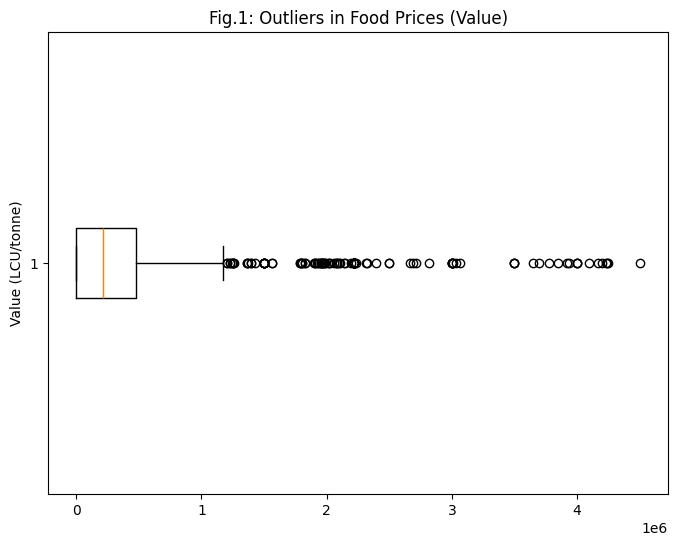

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.boxplot(df['Value'].dropna(), vert=False)
plt.title('Fig.1: Outliers in Food Prices (Value)')
plt.ylabel('Value (LCU/tonne)')
plt.show()

#*The boxplot (Fig.1) visualises the outliers in the 'Value' column, with extreme values indicated as points beyond the whiskers. The importance of this is that it helps identify any values significantly higher or lower than the majority of the dataset*

#**Unique Outliers - Question 1**

['Bananas' 'Beans, dry' 'Cabbages' 'Carrots and turnips' 'Cassava, fresh'
 'Cereals n.e.c.' 'Cotton lint, ginned' 'Cotton seed'
 'Cucumbers and gherkins' 'Dates' 'Eggplants (aubergines)' 'Green garlic'
 'Groundnuts, excluding shelled' 'Hen eggs in shell, fresh' 'Kola nuts'
 'Lemons and limes' 'Lettuce and chicory' 'Maize (corn)'
 'Mangoes, guavas and mangosteens' 'Meat of camels, fresh or chilled'
 'Meat of cattle with the bone, fresh or chilled'
 'Meat of cattle with the bone, fresh or chilled (biological)'
 'Meat of chickens, fresh or chilled'
 'Meat of chickens, fresh or chilled (biological)'
 'Meat of goat, fresh or chilled'
 'Meat of goat, fresh or chilled (biological)'
 'Meat of pig with the bone, fresh or chilled'
 'Meat of sheep, fresh or chilled'
 'Meat of sheep, fresh or chilled (biological)' 'Melonseed' 'Millet'
 'Natural honey' 'Okra' 'Onions and shallots, dry (excluding dehydrated)'
 'Onions and shallots, green' 'Oranges' 'Other fruits, n.e.c.'
 'Other pulses n.e.c.' 'Othe

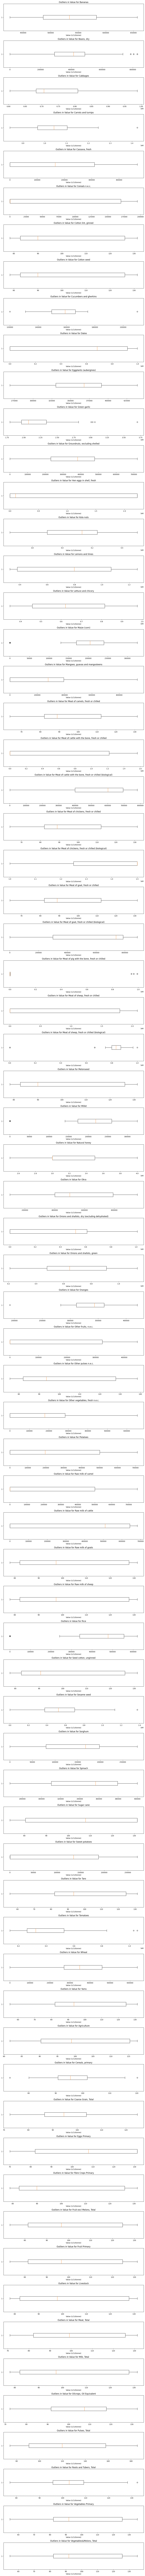

In [ ]:
#Ploting outliers for each unique item in 'Item'
unique_items=df['Item'].unique()
print(unique_items)
plt.figure(figsize=(12, len(unique_items) * 3))

for i, item in enumerate(unique_items, start=1):

    plt.subplot(len(unique_items), 1, i)

    item_values = df[df['Item'] == item]['Value'].dropna()

    plt.boxplot(item_values, vert=False)

    plt.title(f'Outliers in Value for {item}')

    plt.xlabel('Value (LCU/tonne)')



plt.tight_layout()

plt.show()

#The notable example of outliers is the Beans, dry prices as summarised here;
- The outliers for 'Beans, dry'shows a few high price values such as 829,LCU/tonne in 2008 and 805,000 LCU/tonne in 2009. This is special because the prices are higher than typical for staple foods that are generally stable.
- The reason likely reason for this spike in prices is due to unsual market conditions or potential inconsistencies in the data. This requires further investigation.

In [ ]:
beans_outliers=df[(df['Item']=='Beans, dry')&(df['Value']>10000)]
print(beans_outliers)

     StartDate    EndDate  Area Code  Area Item Code        Item  \
12  2007-01-01 2007-12-31         39  Chad       176  Beans, dry   
13  2008-01-01 2008-12-31         39  Chad       176  Beans, dry   
14  2009-01-01 2009-12-31         39  Chad       176  Beans, dry   
15  2010-01-01 2010-12-31         39  Chad       176  Beans, dry   
16  2011-01-01 2011-12-31         39  Chad       176  Beans, dry   
..         ...        ...        ...   ...       ...         ...   
104 2017-01-01 2017-12-31         39  Chad       176  Beans, dry   
105 2018-01-01 2018-12-31         39  Chad       176  Beans, dry   
106 2020-01-01 2020-12-31         39  Chad       176  Beans, dry   
107 2021-01-01 2021-12-31         39  Chad       176  Beans, dry   
108 2022-01-01 2022-12-31         39  Chad       176  Beans, dry   

     Element Code                     Element  Year Code  Year  Months Code  \
12         5530.0  Producer Price (LCU/tonne)     2007.0  2007       7021.0   
13         5530.0  Produc

#**Histograms and Interpretation - Question 2**

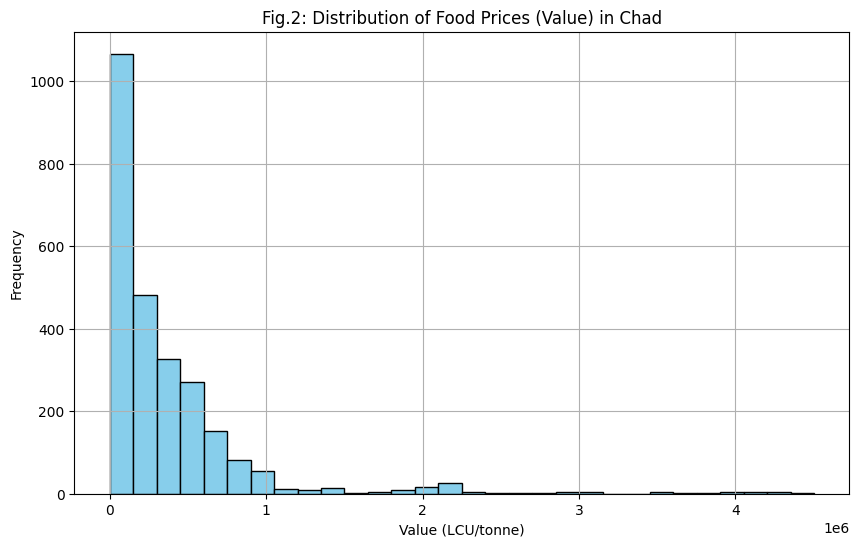

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#Plotting histogram
plt.figure(figsize=(10,6))
plt.hist(df['Value'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Fig.2: Distribution of Food Prices (Value) in Chad')
plt.xlabel('Value (LCU/tonne)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt

#The histogram shows the distribution of food prices (in local currency units per tonne) in Chad. The results can be interpreted as foolows;
- The data is heavily skewed (skewed distribution), implying that most food prices in the country are concentrated at the lower end of the scale, with long tail extending towards higher prices. This is an indication that high food prices are relatively rare, while most prices fall within a lower range.
- The tallest bars are clustered around lower price ranges (High frequency of low prices). This is an indication that the majority of food prices are relatively low, likely showing how most prices behave.
- There are few bars spreading far to the right of the histogram, which represents occassional spiking in food prices. This likely corresponds to extreme market events like abnormal shortages, inflation or seasonal challenges that drive prices significantly up.

#Interpretation for a Layman
- A layman in this case refers to non-experts. Based on the results, it can be communicated as follows;

*This histogram informs us that food prices in Chad usually remain low. However, the prices may occassionally spike to very high levels. Thus, the rare, high-price occurrences can be investigated further because they may reveal important insights into the market dynamics or specific events affecting food supply in Chad.*

#**Unexpected Relationships - Question 3**
 - Unexpected relationship are likely to appear between months or seasonality and price values in a food price data. For example, if certain staple food items show consistent price increases in particular months, like during dry season or a holiday period, it may be a sign of seasonal effect on prices.
 - Such a patter may be because of supply and demand changes, where limited agriculural production or higher consumer demand drives prices temporarily.
 - This is demonstrated below;

In [ ]:
monthly_averages=df.groupby('Months')['Value'].mean()
print(monthly_averages)

Months
ANNUAL VALUE    141492.074180
APRIL           568972.391000
AUGUST          608382.266667
DECEMBER        559525.012745
FEBRUARY        527739.842000
JANUARY         546346.929134
JULY            597039.397000
JUNE            581052.748000
MARCH           545587.406000
MAY             576661.926263
NOVEMBER        560557.589216
OCTOBER         560687.347959
SEPTEMBER       571611.580000
Name: Value, dtype: float64


- The results indicate variation in averahe food prices per month, with higher average prices appearing in months like August and July. This is likely suggestion a seasonal patter, where prices tend to rise in mid-year months, possibly due to seasonal supply shortages or increased demand during certian period of the year.

#Organisations or Individuals that would be interested in the data insights - Question 4
i) Ministry of Agriculture - Food security department
- The reason for the interest is that government bodies are responsible for ensuring food security and stable food prices, especially in developing countries like Chad. Insights into seasonal price trends and outliers in staple food prices can help in planning for food shortages, allocate subsidies and prepare times of high or low demand/supply.

ii) NGOS Focused on food aid
- Reason is that NGOs like World Food Programme (WFP) rely on data to assess food accessibility and affordability for vulnerable populations. Insights into prices spikes or seasonal trends can help them determine when and where to distribute food aid, develop programs to mitigate hunger during high prices.

iii) Market analysts and agriculture traders
- The reason is that traders and analysts need insights into price trends to make informed business decisions. For agriculture traders, they need to understand when prices are likely to rise or fall so that they can plan purchasing and selling strategies to maximisw profits. Analysts can use data to perform forecasts and inform their clients on trends in the food market.

#**Video Insigts**
From the video, I draw the following insights;
- The speaker, Shingai Manjengwa speaking at Pozitive Technologies 2023 highlights the transformative role of AI in data-driven decision making.
i) She illustates that advancements in AI and large language model are helpful in bridging the gap between traditional analytics and actionable business insights. This has enabled executives to make informaed decisions based on robust data rather than intuition alone.
ii) Her insights also informs on critical importance of defining clear business objectives to ensure that AI technologies are effectively leveraged for optimising performance and drive value.